# Fundamentals of Data Science Final Project



## Introduction
- Brief introduction about the dataset and motivation for choosing it.
- Dataset link and number of records.
- Explanation of each variable and field of interest.

# import necessary libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset


In [11]:
df = pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


# Describe the dataset


In [12]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


## Data Cleaning
# Drop unnecessary columns (if any)

In [13]:
df.drop(columns=['salary_currency'], inplace=True)  # Dropping 'salary_currency' as we use 'salary_in_usd'

# Rename columns for better readability
df.rename(columns={
    'work_year': 'year',
    'experience_level': 'experience',
    'employment_type': 'employment',
    'job_title': 'job',
    'employee_residence': 'residence',
    'remote_ratio': 'remote',
    'company_location': 'location',
    'company_size': 'size'
}, inplace=True)

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing data (none in this dataset, but code included for demonstration)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [18]:
df.head(10)

,year,experience,employment,job,salary,salary_in_usd,residence,remote,location,size
0,2024,SE,FT,AI Engineer,202730,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,45864,US,0,US,M


## Pandas’ Aggregate Functions
# Using aggregate functions

In [19]:
mean_salary = df['salary_in_usd'].mean()
sum_salary = df['salary_in_usd'].sum()
median_salary = df['salary_in_usd'].median()
max_salary = df['salary_in_usd'].max()

print(f'Mean Salary in USD: {mean_salary}')
print(f'Sum of Salaries in USD: {sum_salary}')
print(f'Median Salary in USD: {median_salary}')
print(f'Max Salary in USD: {max_salary}')

Mean Salary in USD: 146662.1795708494
Sum of Salaries in USD: 1483194622
Median Salary in USD: 138750.0
Max Salary in USD: 800000


## Data Visualization


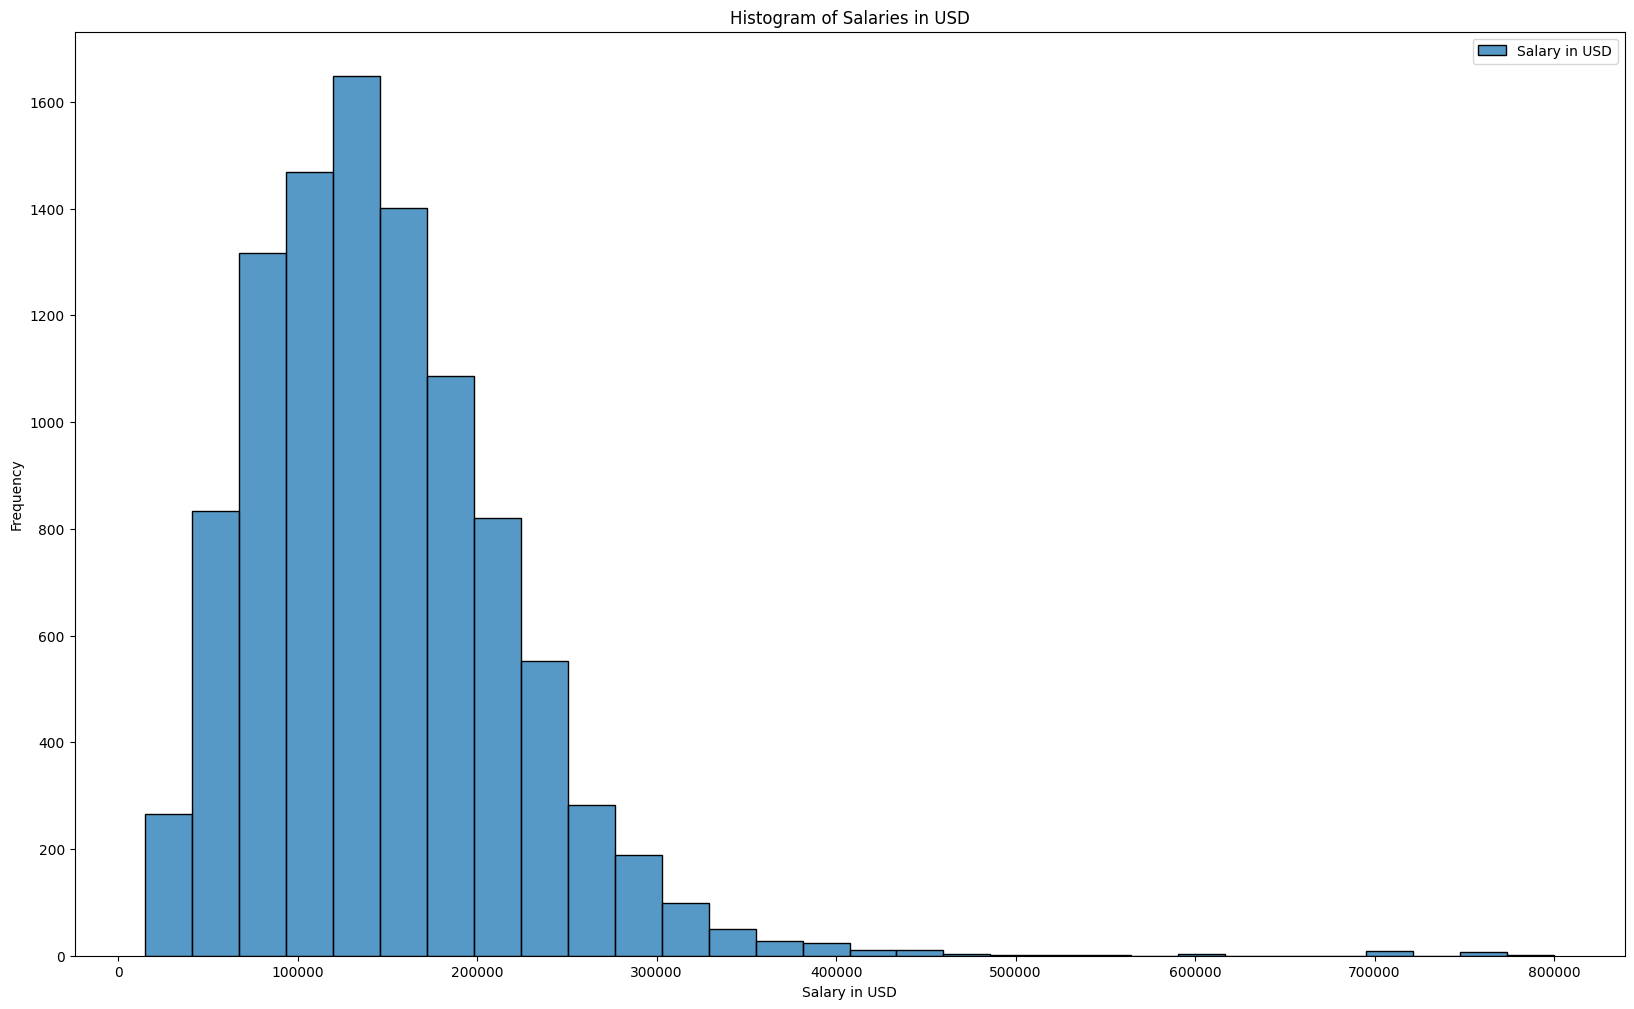

In [26]:
# Plot 1: Histogram of Salaries in USD
plt.figure(figsize=(20, 12))
sns.histplot(df['salary_in_usd'], bins=30)
plt.title('Histogram of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend(['Salary in USD'])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6984\3088718209.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job', y='salary_in_usd', estimator=np.mean, ci=None, data=df)


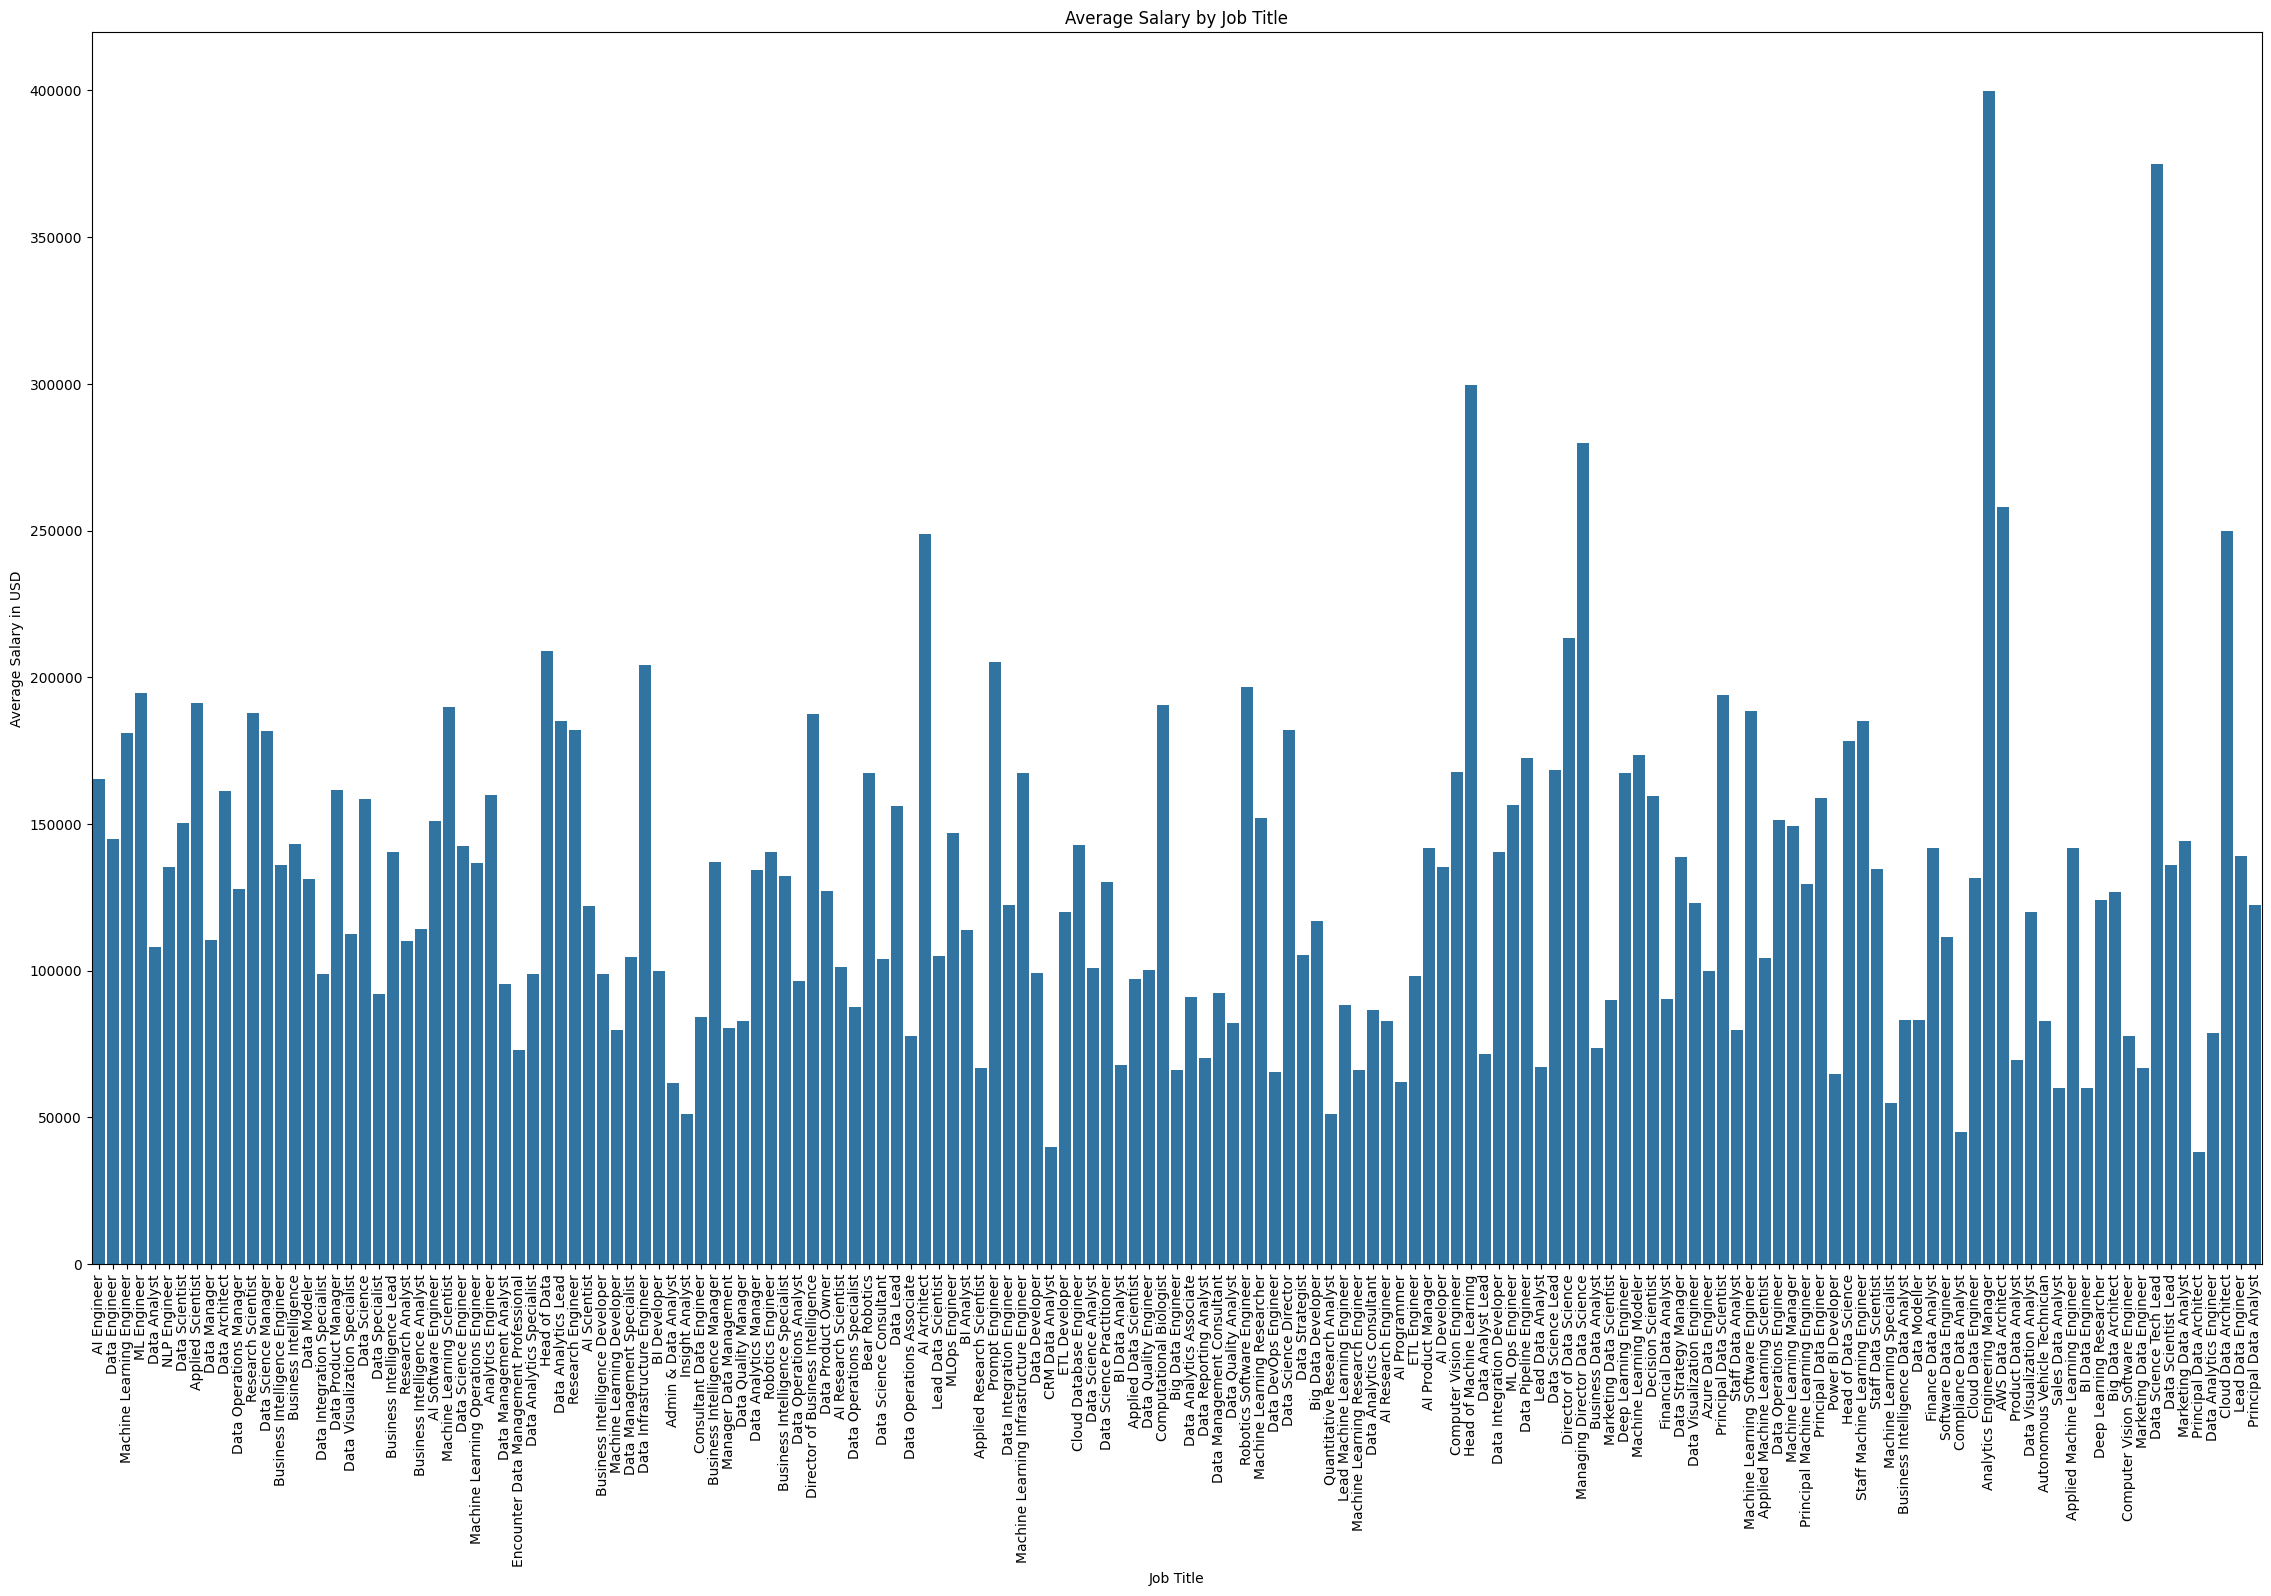

In [22]:
# Plot 2: Bar plot of Job Titles vs. Average Salary in USD
plt.figure(figsize=(28, 16))
sns.barplot(x='job', y='salary_in_usd', estimator=np.mean, ci=None, data=df)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=90)
plt.show()

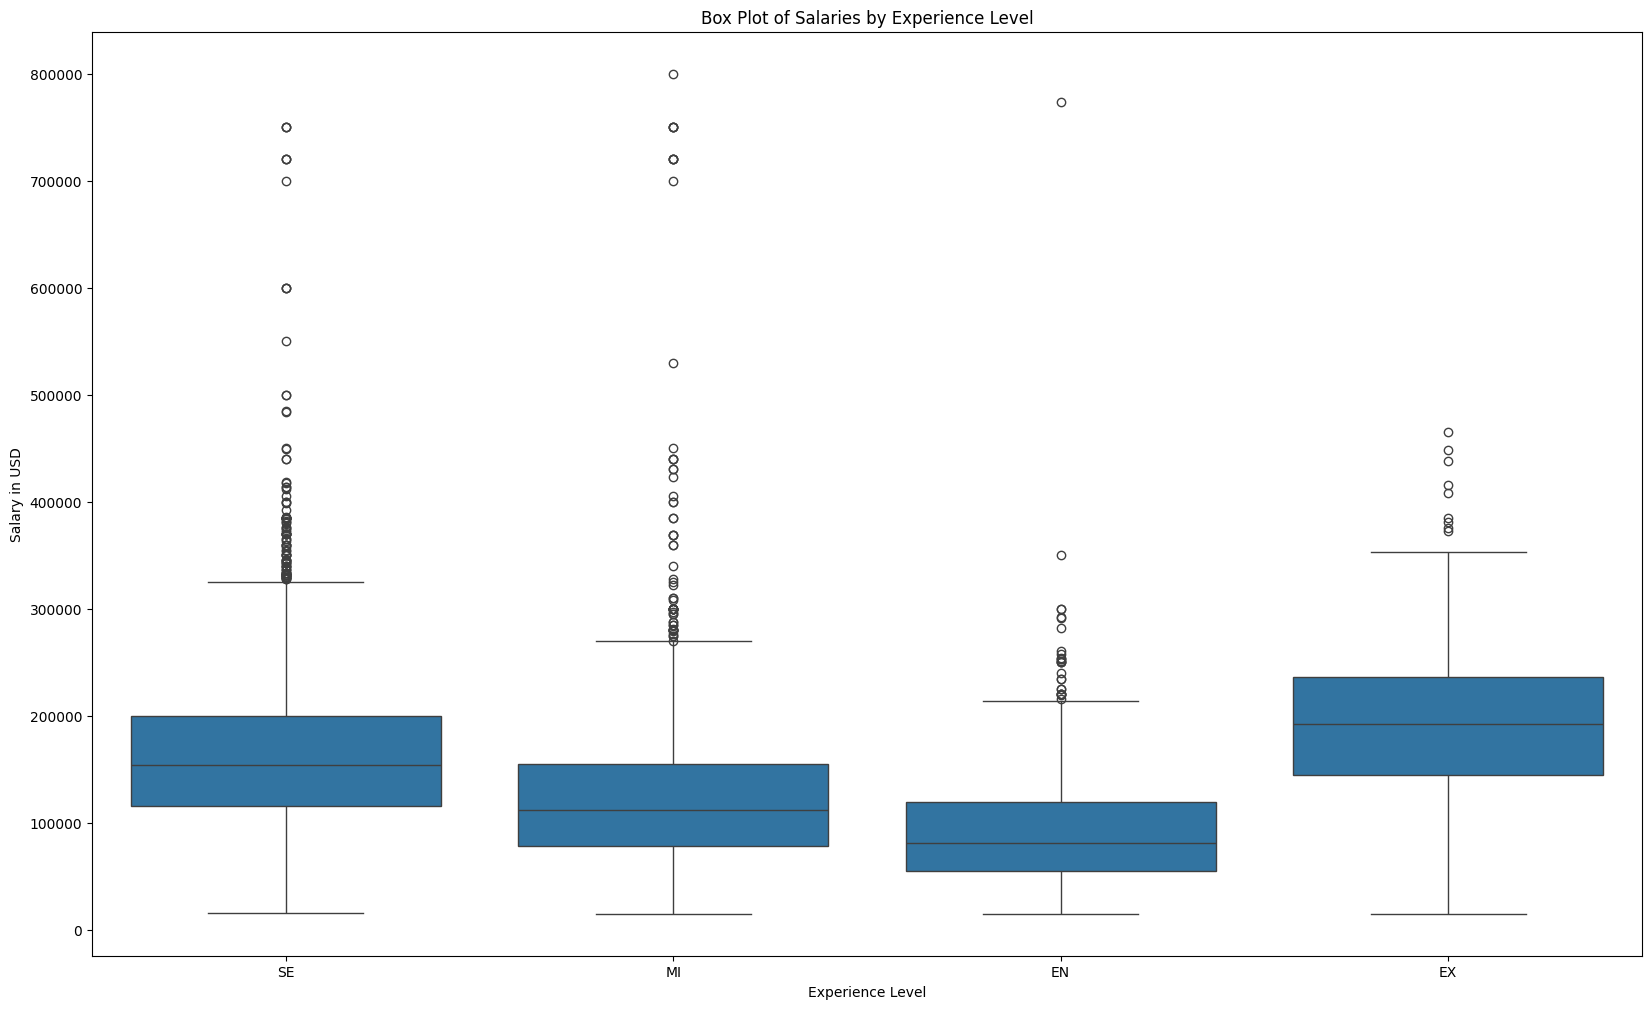

In [25]:
# Plot 3: Box plot of Salaries by Experience Level
plt.figure(figsize=(20, 12))
sns.boxplot(x='experience', y='salary_in_usd', data=df)
plt.title('Box Plot of Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

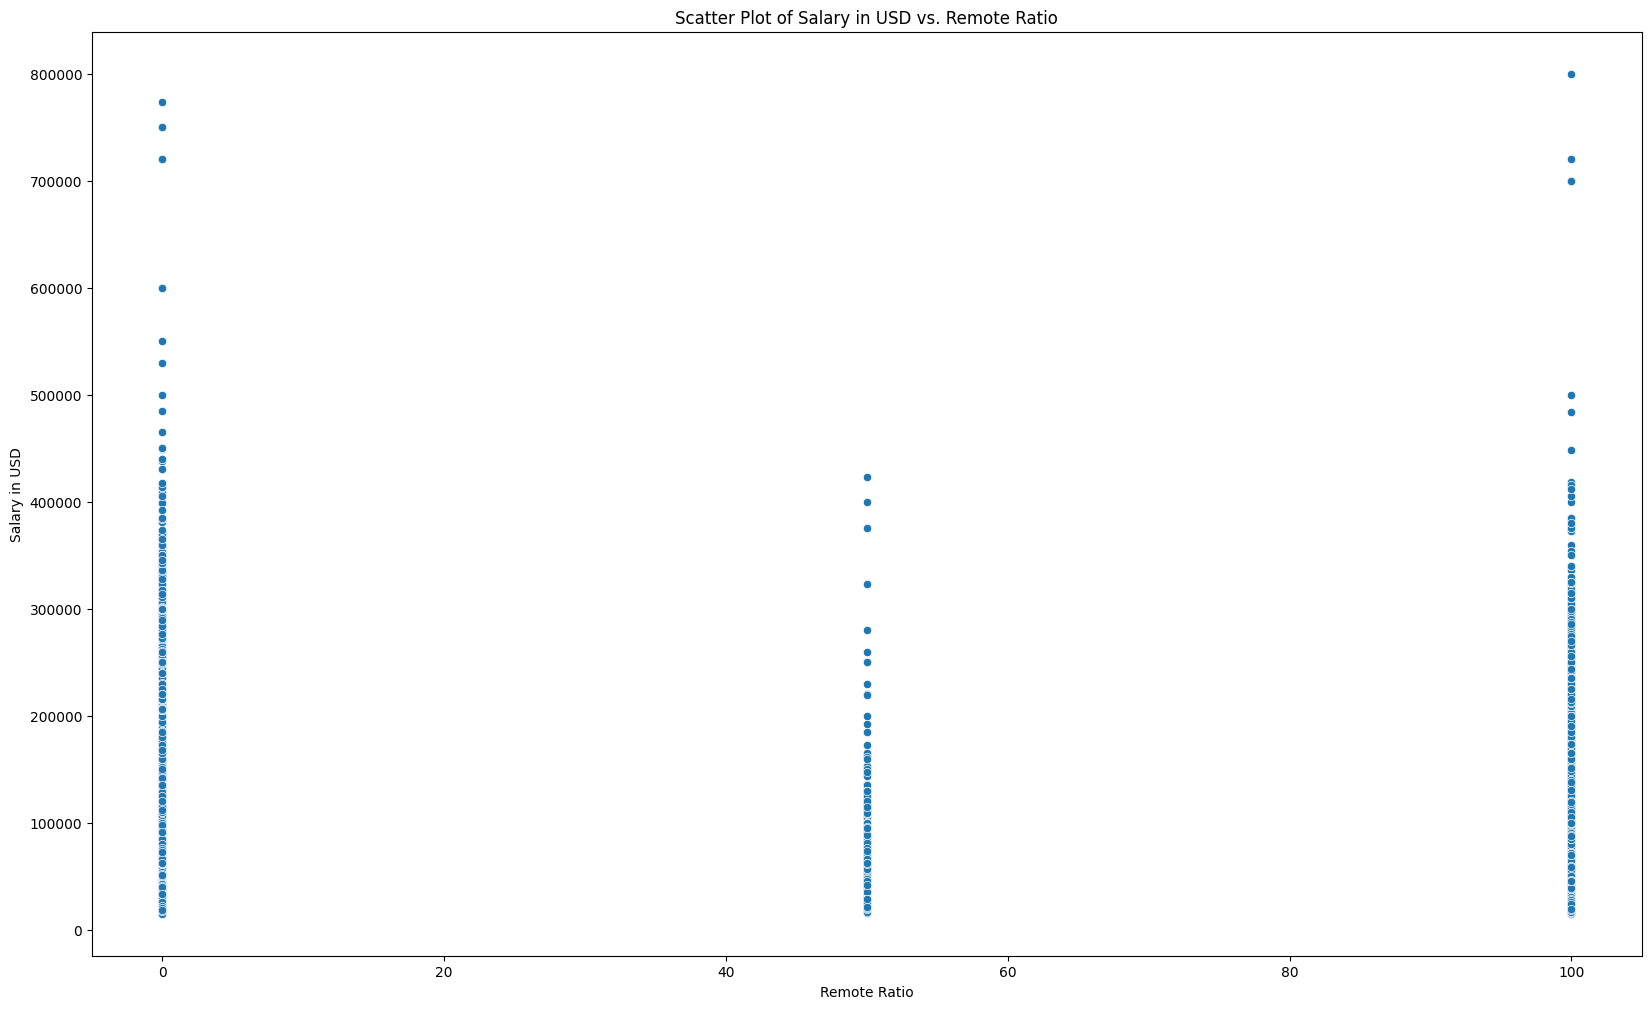

In [27]:
# Plot 4: Scatter plot of Salary in USD vs. Remote Ratio
plt.figure(figsize=(20, 12))
sns.scatterplot(x='remote', y='salary_in_usd', data=df)
plt.title('Scatter Plot of Salary in USD vs. Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()
